In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('winequality-red.csv')


In [3]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

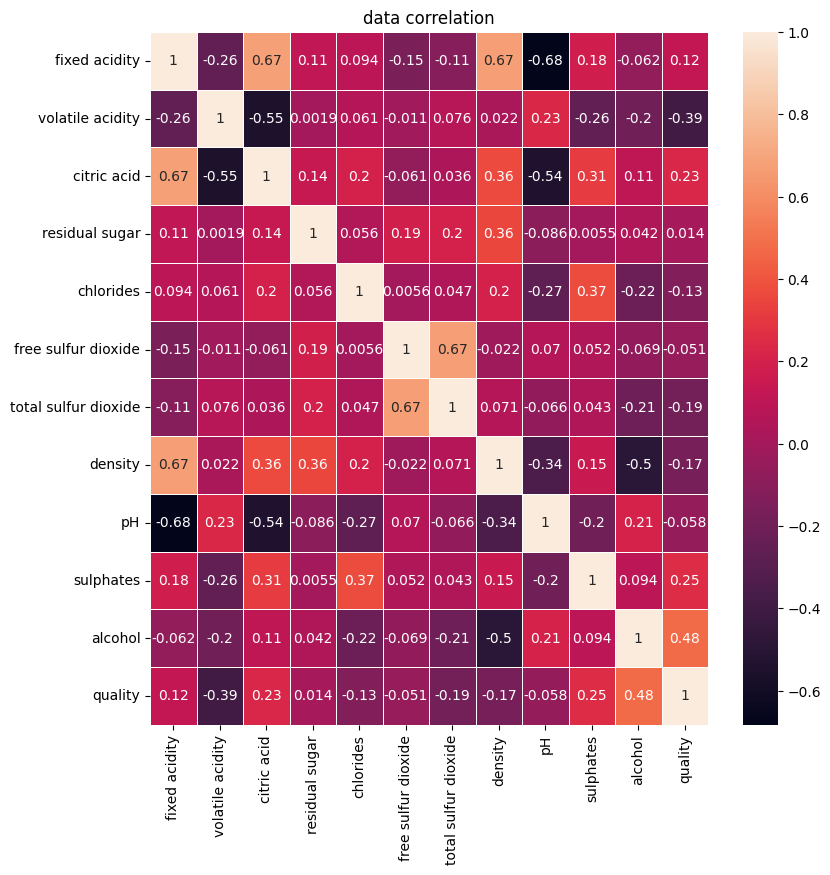

In [7]:
plt.figure(figsize=(9, 9))
sb.heatmap(df.corr(), annot=True, linewidths=0.6)
plt.title('data correlation')
plt.show()

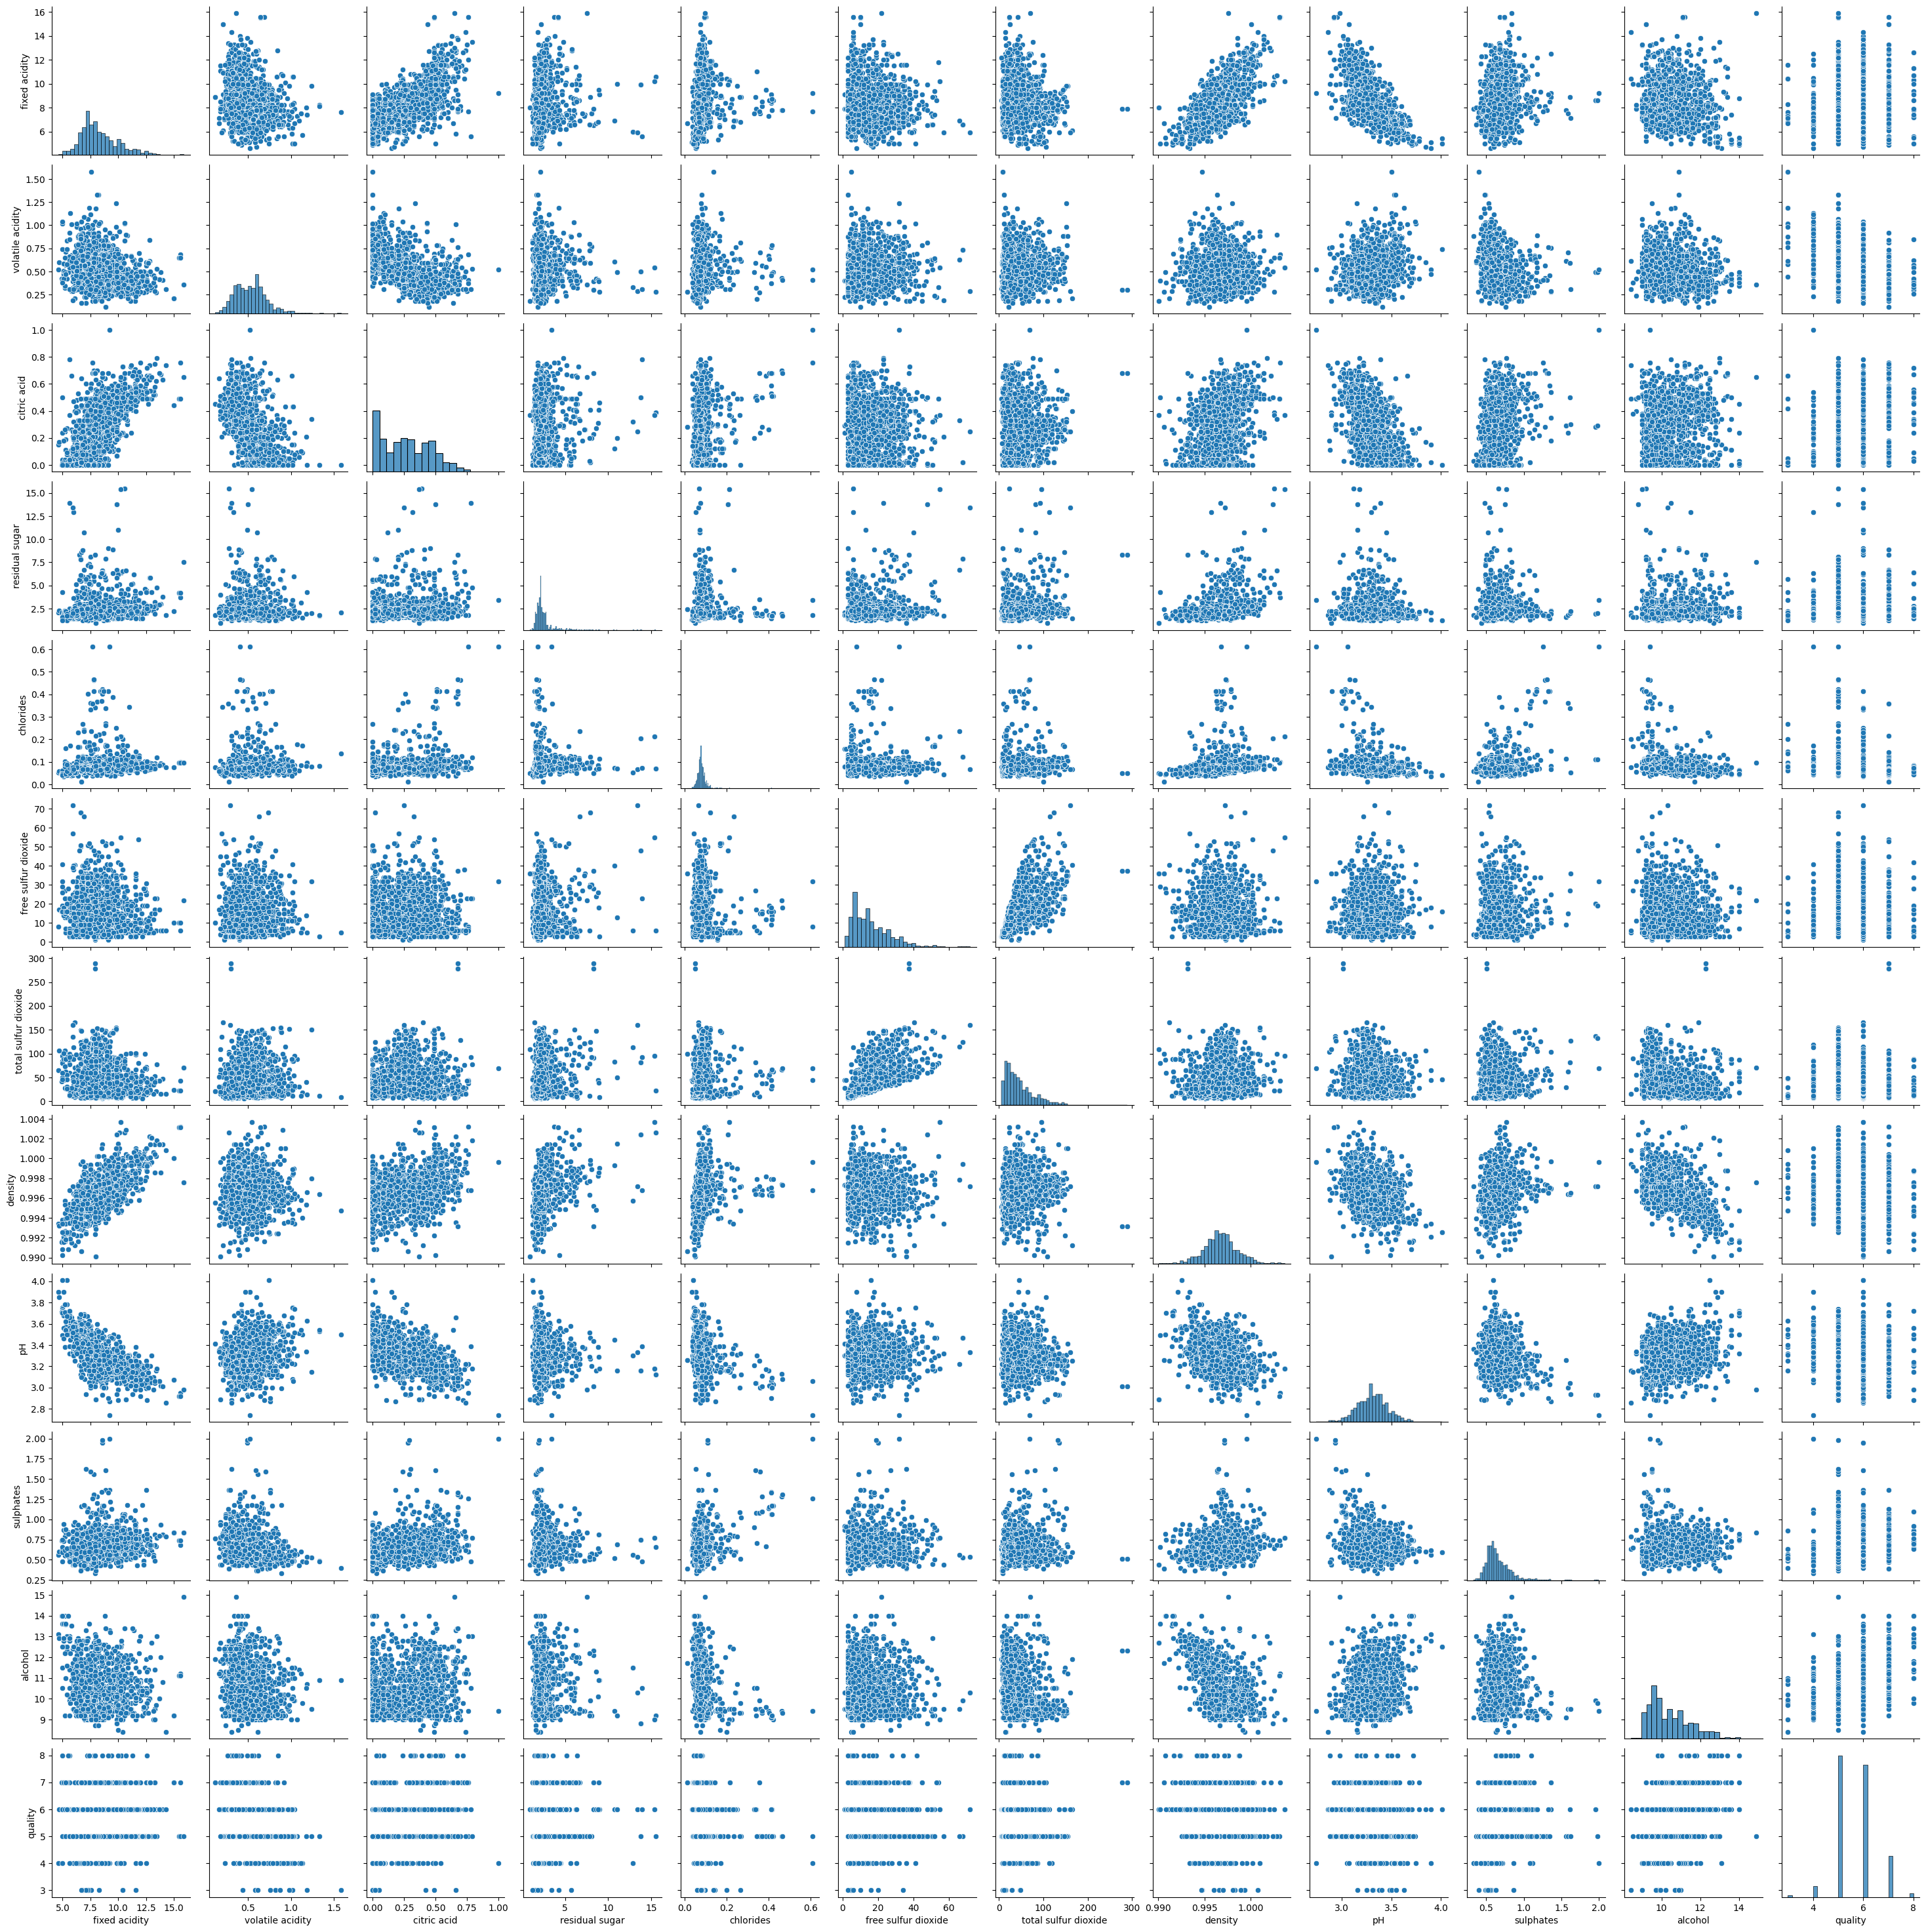

In [8]:
sb.pairplot(df)

In [9]:
X = df.drop('quality', axis=1).values
Y = df['quality'].values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2,  random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [10]:
Y_pred = model.predict(X_test)

In [11]:
print(X_test) #print the test dataset


[[ 7.7    0.56   0.08  ...  3.24   0.66   9.6  ]
 [ 7.8    0.5    0.17  ...  3.39   0.48   9.5  ]
 [10.7    0.67   0.22  ...  3.28   0.98   9.9  ]
 ...
 [ 8.3    0.6    0.25  ...  3.15   0.53   9.8  ]
 [ 8.8    0.27   0.39  ...  3.15   0.69  11.2  ]
 [ 9.1    0.765  0.04  ...  3.29   0.54   9.7  ]]


In [12]:
print(Y_pred) #print predicted values

[5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707 6.76198733 5.89745261
 6.07833712 6.43522754 5.29499011 6.4546625  5.45007864 5.69644693
 5.72368681 6.41233601 5.31025119 5.84548953 6.31433877 5.205850

In [13]:
print(Y_test)

[6 5 6 5 6 5 5 5 5 6 7 3 5 5 6 7 5 7 8 5 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 5 7
 5 4 6 5 5 7 5 5 6 7 6 5 6 5 5 5 7 6 6 6 5 5 5 5 7 5 6 6 5 6 5 6 5 6 4 6 6
 6 5 8 5 6 6 5 6 5 6 6 7 5 6 7 4 7 6 5 5 5 6 5 6 5 6 5 5 5 7 6 7 6 5 6 5 8
 5 6 5 6 7 6 6 5 6 6 6 6 6 6 6 7 6 5 5 6 5 5 5 6 5 5 5 5 6 7 6 8 5 5 5 6 6
 6 5 6 7 6 5 6 5 5 6 6 6 7 5 7 5 5 5 6 6 5 5 6 5 7 6 7 6 6 5 5 6 4 6 5 7 5
 5 4 5 7 6 5 6 6 7 6 5 5 6 5 7 5 6 6 5 7 5 5 5 6 7 7 5 5 6 6 7 6 5 6 6 6 6
 6 7 4 5 5 7 5 5 5 5 6 6 5 7 5 6 6 6 5 4 6 7 6 7 5 6 6 5 5 6 5 6 4 5 6 6 5
 6 6 5 5 6 7 7 6 5 6 6 5 6 5 6 5 5 5 6 6 6 7 5 5 6 5 7 5 6 4 6 6 8 6 5 5 6
 5 7 6 6 5 5 7 6 6 5 6 6 5 7 6 6 6 6 5 6 5 5 6 4]


Text(0, 0.5, 'Predicted quality')

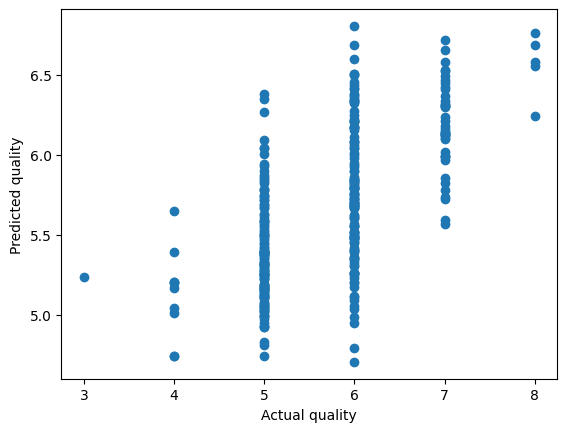

In [14]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [15]:
print(type(Y_pred))

<class 'numpy.ndarray'>


In [16]:
print(type(Y_test))

<class 'numpy.ndarray'>


In [17]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [30]:
X_test

array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
       [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
       [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
       ...,
       [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
       [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]],
      shape=(320, 11))

In [19]:
X_train

array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
       [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
       [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]], shape=(1279, 11))

In [20]:
Y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

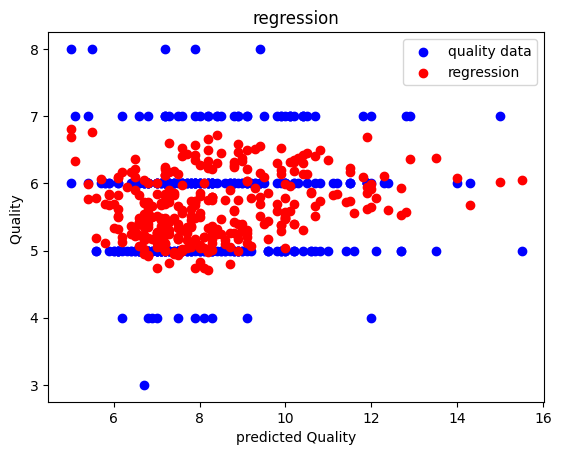

In [33]:
plt.scatter(X_test[:,0], Y_test, color='blue', label='quality data')
plt.scatter(X_test[:,0], Y_pred, color='red', label='regression')
plt.xlabel('predicted Quality')
plt.ylabel('Quality ')
plt.title('regression')
plt.legend()
plt.show()

In [22]:
mse = mean_squared_error(X_test[:,0], Y_pred.round())
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.412031250000002


In [23]:
Y_pred

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

In [24]:
X_test

array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
       [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
       [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
       ...,
       [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
       [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]],
      shape=(320, 11))

In [25]:
X_train


array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
       [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
       [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]], shape=(1279, 11))

In [26]:
Y_train

array([6, 6, 6, ..., 5, 7, 6], shape=(1279,))

In [27]:
Y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [31]:
accuracy = accuracy_score(Y_test, Y_pred.round())
print("Supervised AI Accuracy:", accuracy)

Supervised AI Accuracy: 0.571875
